In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
#connection
conn = sql.connect('database.sqlite')
conn

In [3]:
# conn = sql.connect('data.sqlite')
# conn

In [1]:
# dir(sql)

In [5]:
'select * from Salaries'

'select * from Salaries'

In [6]:
#type table
pd.read_sql_query("select * from sqlite_master", conn) #(query, db connection)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [7]:
#table
pd.read_sql_query("select * from sqlite_master where type = 'table'",conn)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...


In [8]:
# custom function


### table info

In [9]:
pd.read_sql_query("PRAGMA table_info(Salaries)", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,Id,INTEGER,0,None,1
1,1,EmployeeName,TEXT,0,None,0
2,2,JobTitle,TEXT,0,None,0
3,3,BasePay,NUMERIC,0,None,0
4,4,OvertimePay,NUMERIC,0,None,0
5,5,OtherPay,NUMERIC,0,None,0
6,6,Benefits,NUMERIC,0,None,0
7,7,TotalPay,NUMERIC,0,None,0
8,8,TotalPayBenefits,NUMERIC,0,None,0
9,9,Year,INTEGER,0,None,0


In [10]:
pd.read_sql_query("select * from Salaries", conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [11]:
pd.read_sql_query("select * Salaries", conn)

DatabaseError: Execution failed on sql 'select * Salaries': near "Salaries": syntax error

### null values

In [12]:
pd.read_sql_query("select * from salaries where employeename is null" ,conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [13]:
pd.read_sql_query("select employeename from salaries where employeename is null" ,conn)

,EmployeeName


In [14]:
pd.read_sql_query("select * from salaries where employeename is null or jobtitle is null" ,conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [15]:
pd.read_sql_query("select * from salaries where employeename null or jobtitle null" ,conn)

DatabaseError: Execution failed on sql 'select * from salaries where employeename null or jobtitle null': near "null": syntax error

In [16]:
pd.read_sql_query("select * from salaries where employeename is not null" ,conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [17]:
pd.read_sql_query("select * from salaries where employeename not null" ,conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


### distinct

In [18]:
pd.read_sql_query("select DISTINCT jobtitle from SALARIES" , CONN)

NameError: name 'CONN' is not defined

In [ ]:
pd.read_sql_query("select DISTINCT jobtitle from SALARIES" , conn)

In [ ]:
pd.read_sql_query("select DISTINCT(jobtitle) from SALARIES" , conn)

### Alias

In [19]:
pd.read_sql_query("select employee name Employee FROM SALARIES", conn)

DatabaseError: Execution failed on sql 'select employee name Employee FROM SALARIES': near "Employee": syntax error

In [20]:
pd.read_sql_query("select employeename Employee FROM SALARIES", conn)

,Employee
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,Not provided
148651,Not provided
148652,Not provided


In [21]:
pd.read_sql_query("select employeename Name of Employees FROM SALARIES", conn)

DatabaseError: Execution failed on sql 'select employeename Name of Employees FROM SALARIES': near "of": syntax error

In [22]:
pd.read_sql_query("select employeename 'Name of Employees' FROM SALARIES", conn)

,Name of Employees
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,Not provided
148651,Not provided
148652,Not provided


In [23]:
pd.read_sql_query("select employeename Name_of_Employees FROM SALARIES", conn)

,Name_of_Employees
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,Not provided
148651,Not provided
148652,Not provided


In [24]:
pd.read_sql_query("select employeename as Name of Employees FROM SALARIES", conn)

DatabaseError: Execution failed on sql 'select employeename as Name of Employees FROM SALARIES': near "of": syntax error

In [25]:
pd.read_sql_query("select employeename as 'Name of Employees' FROM SALARIES", conn)

,Name of Employees
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,Not provided
148651,Not provided
148652,Not provided


In [26]:
pd.read_sql_query("select employeename as (Name of Employees) FROM SALARIES", conn)

DatabaseError: Execution failed on sql 'select employeename as (Name of Employees) FROM SALARIES': near "(": syntax error

In [27]:
pd.read_sql_query("select employeename as '(Name of Employees)' FROM SALARIES", conn)

,(Name of Employees)
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,Not provided
148651,Not provided
148652,Not provided


In [28]:
#function

def sql_query(q):
    return pd.read_sql_query(q,conn)

In [29]:
q = '''select * froM Salaries'''

sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [85]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

### Ascending/Descending order by

In [86]:
q = '''select basepay,totalpay from salaries'''

sql_query(q)

,BasePay,TotalPay
0,167411.18,567595.43
1,155966.02,538909.28
2,212739.13,335279.91
3,77916,332343.61
4,134401.6,326373.19
...,...,...
148649,0,0.00
148650,Not Provided,0.00
148651,Not Provided,0.00
148652,Not Provided,0.00


In [31]:
q = '''select basepay,totalpay,otherpay from salaries order by 2'''

sql_query(q)

,BasePay,TotalPay,OtherPay
0,0,-618.13,-618.13
1,0,0.00,0
2,0,0.00,0
3,0,0.00,0
4,0,0.00,0
...,...,...,...
148649,128808.87,362844.66,13126.31
148650,318835.49,390111.98,60563.54
148651,129150.01,471952.64,342802.63
148652,155966.02,538909.28,137811.38


In [32]:
q = '''select basepay,totalpay,otherpay from salaries order by 2 desc'''

sql_query(q)

,BasePay,TotalPay,OtherPay
0,167411.18,567595.43,400184.25
1,155966.02,538909.28,137811.38
2,129150.01,471952.64,342802.63
3,318835.49,390111.98,60563.54
4,128808.87,362844.66,13126.31
...,...,...,...
148649,0,0.00,0
148650,Not Provided,0.00,Not Provided
148651,Not Provided,0.00,Not Provided
148652,Not Provided,0.00,Not Provided


In [33]:
q = '''select basepay,totalpay,otherpay from salaries order by totalpay desc'''

sql_query(q)

,BasePay,TotalPay,OtherPay
0,167411.18,567595.43,400184.25
1,155966.02,538909.28,137811.38
2,129150.01,471952.64,342802.63
3,318835.49,390111.98,60563.54
4,128808.87,362844.66,13126.31
...,...,...,...
148649,0,0.00,0
148650,Not Provided,0.00,Not Provided
148651,Not Provided,0.00,Not Provided
148652,Not Provided,0.00,Not Provided


In [34]:
q = '''select basepay,totalpay,otherpay from salaries order by totalpay asc'''

sql_query(q)

,BasePay,TotalPay,OtherPay
0,0,-618.13,-618.13
1,0,0.00,0
2,0,0.00,0
3,0,0.00,0
4,0,0.00,0
...,...,...,...
148649,128808.87,362844.66,13126.31
148650,318835.49,390111.98,60563.54
148651,129150.01,471952.64,342802.63
148652,155966.02,538909.28,137811.38


In [35]:
q = '''select employeename, jobtitle from Salaries where employeename = 'Not Provided'
'''

sql_query(q)

,EmployeeName,JobTitle
0,Not Provided,PUBLIC SAFETY COMMUNICATIONS DISPATCHER
1,Not Provided,Public SafetyComm Disp


In [36]:
q = '''select employeename, jobtitle from Salaries where employeename = 'Not provided'
'''

sql_query(q)

,EmployeeName,JobTitle
0,Not provided,Not provided
1,Not provided,Not provided
2,Not provided,Not provided
3,Not provided,Not provided


In [37]:
q = '''select employeename, jobtitle from Salaries where employeename == 'Not Provided'
'''

sql_query(q)

,EmployeeName,JobTitle
0,Not Provided,PUBLIC SAFETY COMMUNICATIONS DISPATCHER
1,Not Provided,Public SafetyComm Disp


### limit

In [38]:
q = '''select employeename, totalpay from Salaries order by 2 desc limit 10'''

sql_query(q)

,EmployeeName,TotalPay
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,471952.64
3,Amy P Hart,390111.98
4,Gary Altenberg,362844.66
5,John Goldberg,350403.41
6,Samson Lai,347102.32
7,Ellen G Moffatt,344187.46
8,William J Coaker Jr.,339653.70
9,Gregory P Suhr,339282.07


In [39]:
q = '''select employeename, totalpay from Salaries order by 2 limit 10'''

sql_query(q)

,EmployeeName,TotalPay
0,Joe Lopez,-618.13
1,PAULETTE ADAMS,0.00
2,KAUKAB MOHSIN,0.00
3,JOSEPHINE MCCREARY,0.00
4,Roland Baylon,0.00
5,Felecia Phillips,0.00
6,Robert Giannini,0.00
7,Nelly Kuan,0.00
8,William Mathews,0.00
9,Gayle Mathews,0.00


In [40]:
q = '''select employeename, totalpay from Salaries order by 2 limit'''

sql_query(q)

DatabaseError: Execution failed on sql 'select employeename, totalpay from Salaries order by 2 limit': incomplete input

In [41]:
q = '''select employeename, totalpay from Salaries order by 2
'''


sql_query(q)

,EmployeeName,TotalPay
0,Joe Lopez,-618.13
1,PAULETTE ADAMS,0.00
2,KAUKAB MOHSIN,0.00
3,JOSEPHINE MCCREARY,0.00
4,Roland Baylon,0.00
...,...,...
148649,Gary Altenberg,362844.66
148650,Amy P Hart,390111.98
148651,David Shinn,471952.64
148652,GARY JIMENEZ,538909.28


In [42]:
q = '''select employeename, totalpay from Salaries order by 2
    where employeename is not 'Not provided'
'''


sql_query(q)

DatabaseError: Execution failed on sql 'select employeename, totalpay from Salaries order by 2
    where employeename is not 'Not provided'
': near "where": syntax error

In [43]:
q = '''select employeename, totalpay from Salaries
    where employeename != 'Not provided'
    and 
    employeename != 'Not Provided'
'''


sql_query(q)

,EmployeeName,TotalPay
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,ALBERT PARDINI,335279.91
3,CHRISTOPHER CHONG,332343.61
4,PATRICK GARDNER,326373.19
...,...,...
148643,Carolyn A Wilson,0.00
148644,Joann Anderson,0.00
148645,Leon Walker,0.00
148646,Roy I Tillery,0.00


In [44]:
q = '''select employeename, totalpay from Salaries
    where employeename != 'Not provided'
    or
    employeename != 'Not Provided'
'''


sql_query(q)

,EmployeeName,TotalPay
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,ALBERT PARDINI,335279.91
3,CHRISTOPHER CHONG,332343.61
4,PATRICK GARDNER,326373.19
...,...,...
148649,Roy I Tillery,0.00
148650,Not provided,0.00
148651,Not provided,0.00
148652,Not provided,0.00


In [45]:
q = '''select employeename, totalpay from Salaries
    where employeename != 'Not provided'
    or
    employeename != 'Not Provided'
    order by 2
'''


sql_query(q)

,EmployeeName,TotalPay
0,Joe Lopez,-618.13
1,PAULETTE ADAMS,0.00
2,KAUKAB MOHSIN,0.00
3,JOSEPHINE MCCREARY,0.00
4,Roland Baylon,0.00
...,...,...
148649,Gary Altenberg,362844.66
148650,Amy P Hart,390111.98
148651,David Shinn,471952.64
148652,GARY JIMENEZ,538909.28


### operators

In [46]:
# Show jobtitle where overtimepay > 50k and excluded 'not provided' rows
q = '''select jobtitle, overtimepay from Salaries
        where overtimepay > 50000
        and
        overtimepay != 'Not Provided'
'''

sql_query(q)

,JobTitle,OvertimePay
0,CAPTAIN III (POLICE DEPARTMENT),245131.88
1,CAPTAIN III (POLICE DEPARTMENT),106088.18
2,WIRE ROPE CABLE MAINTENANCE MECHANIC,56120.71
3,"BATTALION CHIEF, (FIRE DEPARTMENT)",89062.90
4,"BATTALION CHIEF, (FIRE DEPARTMENT)",86362.68
...,...,...
2160,Transit Operator,51625.42
2161,Transit Operator,52550.53
2162,Track Maintenance Worker,50265.23
2163,Diagnostic Imaging Tech I,74935.96


In [47]:
# Show All Employess With A Total Pay Between 50,000 and 75,000
q = '''select employeename, totalpay from salaries
    where totalpay > 50000 and totalpay < 75000
    '''

sql_query(q)

,EmployeeName,TotalPay
0,MAMIKO NAKAMURA,74999.62
1,HEDLEY PRINCE,74998.73
2,LINDA BARNARD,74998.30
3,ANGELA WHITTAKER,74997.84
4,JANE CHU,74997.81
...,...,...
33552,Stephanie Reidy,51785.23
33553,Maria Theresa Luna,52266.82
33554,Paul E Maltzer,51673.98
33555,Kevin I Dolar,50953.19


In [48]:
# Show All Employess With A Total Pay Between 50,000 and 75,000
q = '''select employeename, totalpay from salaries
    where totalpay between 50000 and 75000'''

sql_query(q)

,EmployeeName,TotalPay
0,MAMIKO NAKAMURA,74999.62
1,HEDLEY PRINCE,74998.73
2,LINDA BARNARD,74998.30
3,ANGELA WHITTAKER,74997.84
4,JANE CHU,74997.81
...,...,...
33552,Stephanie Reidy,51785.23
33553,Maria Theresa Luna,52266.82
33554,Paul E Maltzer,51673.98
33555,Kevin I Dolar,50953.19


In [49]:
# Show All Employees With A BasePay less than 50,000 Or A TotalPay Greater Than 100,000
q = '''select employeename, basepay, totalpay from Salaries
    where basepay < 50000 
    or
    totalpay > 100000
    order by 3 desc
    limit 10'''

sql_query(q)

,EmployeeName,BasePay,TotalPay
0,NATHANIEL FORD,167411.18,567595.43
1,GARY JIMENEZ,155966.02,538909.28
2,David Shinn,129150.01,471952.64
3,Amy P Hart,318835.49,390111.98
4,Gary Altenberg,128808.87,362844.66
5,John Goldberg,104404.00,350403.41
6,Samson Lai,186236.42,347102.32
7,Ellen G Moffatt,270222.04,344187.46
8,William J Coaker Jr.,257340.00,339653.70
9,Gregory P Suhr,319275.01,339282.07


In [50]:
# Show All Employees With A BasePay less than 50,000 Or A TotalPay Greater Than 100,000
q = '''select employeename, basepay, totalpay from Salaries
    order by 3 desc
    limit 10
    where basepay < 50000 
    or
    totalpay > 100000
    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select employeename, basepay, totalpay from Salaries
    order by 3 desc
    limit 10
    where basepay < 50000 
    or
    totalpay > 100000
    ': near "where": syntax error

In [51]:
# Show All Employees With A BasePay less than 50,000 Or A TotalPay Greater Than 100,000
q = '''select employeename, basepay, totalpay from Salaries
    order by 3 desc
    where basepay < 50000 
    or
    totalpay > 100000
    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select employeename, basepay, totalpay from Salaries
    order by 3 desc
    where basepay < 50000 
    or
    totalpay > 100000
    ': near "where": syntax error

### in

In [52]:
q='''select employeename, jobtitle from salaries
    where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
    or 
    jobtitle = 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
'''

sql_query(q)

,EmployeeName,JobTitle
0,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT)
1,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT)
2,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC
3,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT)
4,ANNA BROWN,CAPTAIN III (POLICE DEPARTMENT)
5,RICHARD PARRY,CAPTAIN III (POLICE DEPARTMENT)
6,DONNA MEIXNER,CAPTAIN III (POLICE DEPARTMENT)
7,JOHN MURPHY,CAPTAIN III (POLICE DEPARTMENT)
8,SHARON FERRIGNO,CAPTAIN III (POLICE DEPARTMENT)
9,CROCE CASCIATO,CAPTAIN III (POLICE DEPARTMENT)


In [53]:
q='''select employeename, jobtitle from salaries
    where jobtitle in ('CAPTAIN III (POLICE DEPARTMENT)', 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
    , 'Custodian')
'''

sql_query(q)

,EmployeeName,JobTitle
0,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT)
1,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT)
2,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC
3,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT)
4,ANNA BROWN,CAPTAIN III (POLICE DEPARTMENT)
...,...,...
2458,Lian Xiu Wu,Custodian
2459,George S Dela Pena,Custodian
2460,Richard A Talbert,Custodian
2461,Leon Walker,Custodian


In [54]:
q='''select employeename, jobtitle from salaries
    where jobtitle not in ('CAPTAIN III (POLICE DEPARTMENT)', 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
    , 'Custodian')
'''

sql_query(q)

,EmployeeName,JobTitle
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
2,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II
3,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS
...,...,...
146186,Joann Anderson,Communications Dispatcher 2
146187,Not provided,Not provided
146188,Not provided,Not provided
146189,Not provided,Not provided


### like

In [55]:
q='''select jobtitle from salaries where jobtitle like 'captain%'
'''

sql_query(q)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,CAPTAIN III (POLICE DEPARTMENT)
2,CAPTAIN III (POLICE DEPARTMENT)
3,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
4,"CAPTAIN, FIRE SUPPRESSION"
...,...
516,"Captain, Fire Suppression"
517,Captain 3
518,"Captain, Fire Suppression"
519,Captain 3


In [56]:
q='''select jobtitle from salaries where jobtitle like 'captain'
'''

sql_query(q)

,JobTitle


In [57]:
q='''select jobtitle from salaries where jobtitle like '%keeper'
'''

sql_query(q)

,JobTitle
0,SUPERVISING PARTS STOREKEEPER
1,PARTS STOREKEEPER
2,MUNICIPAL STADIUM GROUNDSKEEPER
3,PARTS STOREKEEPER
4,SENIOR PARTS STOREKEEPER
...,...
601,Assistant Storekeeper
602,Assistant Storekeeper
603,Assistant Storekeeper
604,Assistant Storekeeper


In [58]:
q='''select jobtitle from salaries where jobtitle like '%police%'
'''

sql_query(q)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,CAPTAIN III (POLICE DEPARTMENT)
2,CAPTAIN III (POLICE DEPARTMENT)
3,"COMMANDER III, (POLICE DEPARTMENT)"
4,CHIEF OF POLICE
...,...
8196,Police Officer
8197,Police Officer
8198,Police Officer 3
8199,Community Police Services Aide


In [59]:
q='''select jobtitle from salaries where jobtitle like '%police%'
'''

sql_query(q)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,CAPTAIN III (POLICE DEPARTMENT)
2,CAPTAIN III (POLICE DEPARTMENT)
3,"COMMANDER III, (POLICE DEPARTMENT)"
4,CHIEF OF POLICE
...,...
8196,Police Officer
8197,Police Officer
8198,Police Officer 3
8199,Community Police Services Aide


In [60]:
q='''select employeename, jobtitle from salaries where jobtitle not like '%police%'
'''

sql_query(q)

,EmployeeName,JobTitle
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC
2,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
3,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II
4,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)"
...,...,...
140448,Roy I Tillery,Custodian
140449,Not provided,Not provided
140450,Not provided,Not provided
140451,Not provided,Not provided


In [61]:
q='''select jobtitle from salaries where jobtitle like '%f__e%'
'''

sql_query(q)

,JobTitle
0,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,"BATTALION CHIEF, (FIRE DEPARTMENT)"
2,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
4,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...
16800,Bldg & Grounds Patrol Officer
16801,Fire Alarm Dispatcher
16802,Transit Fare Inspector
16803,Parking Control Officer


In [62]:
q='''select jobtitle from salaries where jobtitle like 'f__e%'
'''

sql_query(q)

,JobTitle
0,FIREFIGHTER
1,FIRE FIGHTER PARAMEDIC
2,FIRE FIGHTER PARAMEDIC
3,FIREFIGHTER
4,FIREFIGHTER
...,...
3764,Firefighter
3765,Firefighter
3766,Firefighter
3767,Firefighter


In [63]:
q='''select jobtitle from salaries where jobtitle glob '*OFFICER*'
'''

sql_query(q)

,JobTitle
0,POLICE OFFICER III
1,POLICE OFFICER I
2,POLICE OFFICER II
3,POLICE OFFICER III
4,POLICE OFFICER III
...,...
2458,PARK PATROL OFFICER
2459,POLICE OFFICER III
2460,PARKING CONTROL OFFICER
2461,PARKING CONTROL OFFICER


In [64]:
q='''select jobtitle from salaries where jobtitle glob '*Officer'
'''

sql_query(q)

,JobTitle
0,Chief Adult Probation Officer
1,Court Executive Officer
2,Police Officer
3,Police Officer
4,Police Officer
...,...
3627,Senior Collections Officer
3628,Police Officer
3629,Bldg & Grounds Patrol Officer
3630,Parking Control Officer


### Aggregate functions

In [65]:
q = '''select count(*) from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''

sql_query(q)

,count(*)
0,37


In [66]:
q = '''select count(jobtitle) from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''

sql_query(q)

,count(jobtitle)
0,37


In [67]:
q = '''select count(jobtitle) 'Captain Count' from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''

sql_query(q)

,Captain Count
0,37


In [68]:
q = '''select count from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''

sql_query(q)

DatabaseError: Execution failed on sql 'select count from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
': no such column: count

In [69]:
#average

q = '''select avg 'avergae TP of Custodian' from Salaries where jobtitle = 'Custodian'
'''

sql_query(q)

DatabaseError: Execution failed on sql 'select avg 'avergae TP of Custodian' from Salaries where jobtitle = 'Custodian'
': no such column: avg

In [70]:
#average

q = '''select avg(totalpay) 'avergae TP of Custodian' from Salaries where jobtitle = 'Custodian'
'''

sql_query(q)

,avergae TP of Custodian
0,47070.542419


In [71]:
#average

q = '''select avg(*) 'avergae TP of Custodian' from Salaries where jobtitle = 'Custodian'
'''

sql_query(q)

DatabaseError: Execution failed on sql 'select avg(*) 'avergae TP of Custodian' from Salaries where jobtitle = 'Custodian'
': wrong number of arguments to function avg()

In [72]:
#max 

q = '''select max(totalpay) from Salaries'''

sql_query(q)

,max(totalpay)
0,567595.43


In [73]:
#max 

q = '''select max(totalpay), employeename from Salaries'''

sql_query(q)

,max(totalpay),EmployeeName
0,567595.43,NATHANIEL FORD


In [74]:
#max 

q = '''select max(totalpay), employeename, jobtitle from Salaries'''

sql_query(q)

,max(totalpay),EmployeeName,JobTitle
0,567595.43,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


In [75]:
# How many employees in the salaries table have OvertimePay equal to 0?
q = '''select count(employeename) from salaries where overtimepay = 0
'''

sql_query(q)

,count(employeename)
0,77321


In [76]:
# How many employees in the salaries table have OvertimePay equal to 0?
q = '''select * from salaries where overtimepay = 0
'''

sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0,51322.50,,307899.46,307899.46,2011,,San Francisco,
2,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.73,,302377.73,302377.73,2011,,San Francisco,
3,13,EDWARD HARRINGTON,EXECUTIVE CONTRACT EMPLOYEE,294580.02,0,0.00,,294580.02,294580.02,2011,,San Francisco,
4,14,JOHN MARTIN,DEPARTMENT HEAD V,271329.03,0,21342.59,,292671.62,292671.62,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77316,148646,Carolyn A Wilson,Human Services Technician,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT
77317,148648,Joann Anderson,Communications Dispatcher 2,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT
77318,148649,Leon Walker,Custodian,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT
77319,148650,Roy I Tillery,Custodian,0,0,0.00,0,0.00,0.00,2014,,San Francisco,PT


In [77]:
# How many employees in the salaries table have OvertimePay equal to 0?
q = '''select count(*) from salaries where overtimepay = 0
'''

sql_query(q)

,count(*)
0,77321


In [78]:
q = '''select * from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''
sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
1,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
2,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00,87082.62,110804.30,,297608.92,297608.92,2011,,San Francisco,
3,62,ANNA BROWN,CAPTAIN III (POLICE DEPARTMENT),102571.24,7437.00,128543.64,,238551.88,238551.88,2011,,San Francisco,
4,66,RICHARD PARRY,CAPTAIN III (POLICE DEPARTMENT),185369.69,37873.61,14465.53,,237708.83,237708.83,2011,,San Francisco,
5,92,DONNA MEIXNER,CAPTAIN III (POLICE DEPARTMENT),102722.40,7437.00,118456.21,,228615.61,228615.61,2011,,San Francisco,
6,94,JOHN MURPHY,CAPTAIN III (POLICE DEPARTMENT),215914.03,0.00,12293.83,,228207.86,228207.86,2011,,San Francisco,
7,126,SHARON FERRIGNO,CAPTAIN III (POLICE DEPARTMENT),185369.68,27321.83,4651.44,,217342.95,217342.95,2011,,San Francisco,
8,212,CROCE CASCIATO,CAPTAIN III (POLICE DEPARTMENT),188341.62,0.00,16206.24,,204547.86,204547.86,2011,,San Francisco,
9,215,JOHN FEENEY,CAPTAIN III (POLICE DEPARTMENT),188348.55,5720.22,10173.43,,204242.20,204242.20,2011,,San Francisco,


In [79]:
q = '''select sum(overtimepay) from salaries where jobtitle = 'CAPTAIN III (POLICE DEPARTMENT)'
'''
sql_query(q)

,sum(overtimepay)
0,587353.74


GROUP BY --- HAVING

GROUP BY works after the WHERE clause filters the rows and before the HAVING clause filters the groups.

- Count Employees by JobTitle
- Average TotalPay by JobTitle
- Employees with the Highest TotalPay in Each Year
- Sum of TotalPay by Year and JobTitle
- Employees with TotalPay Greater Than 1,000,000 by JobTitle
- Employees with Average BasePay Greater Than 50,000 by JobTitle
- Employee Count Greater Than 10 in Each Year
- Job Titles with More Than 5 Employees and Average TotalPay Greater Than 100,000

In [102]:
#Count Employees by JobTitle

q = '''select count(employeename) 'count of employeename', jobtitle from salaries
    group by 2
    '''

sql_query(q)

,count of employeename,JobTitle
0,351,account clerk
1,5,accountant
2,8,accountant i
3,226,accountant ii
4,278,accountant iii
...,...,...
1632,5,worker's compensation supervisor i
1633,126,x-ray laboratory aide
1634,4,youth comm advisor
1635,1,"youth commission advisor, board of supervisors"


In [103]:
#Count Employees by JobTitle

q = '''select count(jobtitle) 'count of employeename', employeename from salaries
    group by 1
    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select count(jobtitle) 'count of employeename', employeename from salaries
    group by 1
    ': aggregate functions are not allowed in the GROUP BY clause

In [104]:
# Average TotalPay by JobTitle

q = '''select jobtitle, avg(totalpay) as AverageOfTotalPay from salaries
group by jobtitle
'''

sql_query(q)

,JobTitle,AverageOfTotalPay
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",62290.780000
4,ACUPUNCTURIST,67594.400000
...,...,...
2154,X-RAY LABORATORY AIDE,52705.880385
2155,X-Ray Laboratory Aide,50823.942700
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2157,Youth Comm Advisor,41414.307500


In [105]:
# Average TotalPay by JobTitle

q = '''select jobtitle, avg(totalpay) as AverageOfTotalPay from salaries
group by jobtitle
order by 2 desc
limit 10
'''

sql_query(q)

,JobTitle,AverageOfTotalPay
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
1,Chief Investment Officer,339653.700000
2,Chief of Police,329183.646667
3,"Chief, Fire Department",325971.683333
4,DEPUTY DIRECTOR OF INVESTMENTS,307899.460000
5,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.730000
6,"Gen Mgr, Public Trnsp Dept",297769.413333
7,Asst Chf of Dept (Fire Dept),281763.483889
8,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",279359.560000
9,"Dep Dir for Investments, Ret",278592.545000


<Axes: ylabel='JobTitle'>

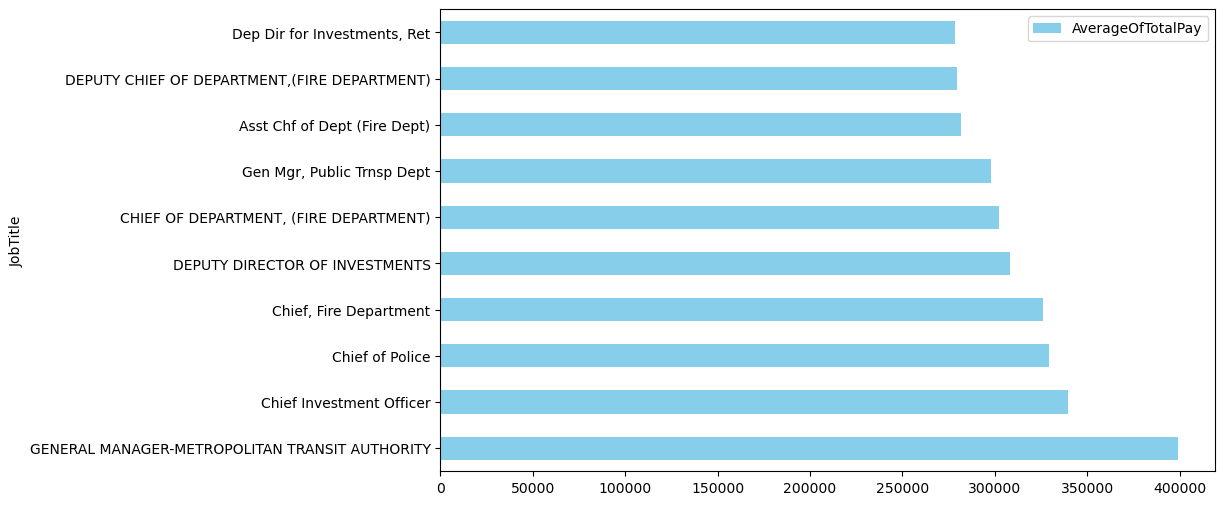

In [107]:
a = pd.read_sql_query(q, conn)
a.plot(kind='barh', x='JobTitle', y='AverageOfTotalPay', color='skyblue', figsize=(10, 6))

# plt.xlabel('Jobtitle')
# plt.ylabel('Average of totalpay')
# plt.title('Top 10 Job Titles by Number of Employees')

# plt.show()


<Axes: xlabel='JobTitle'>

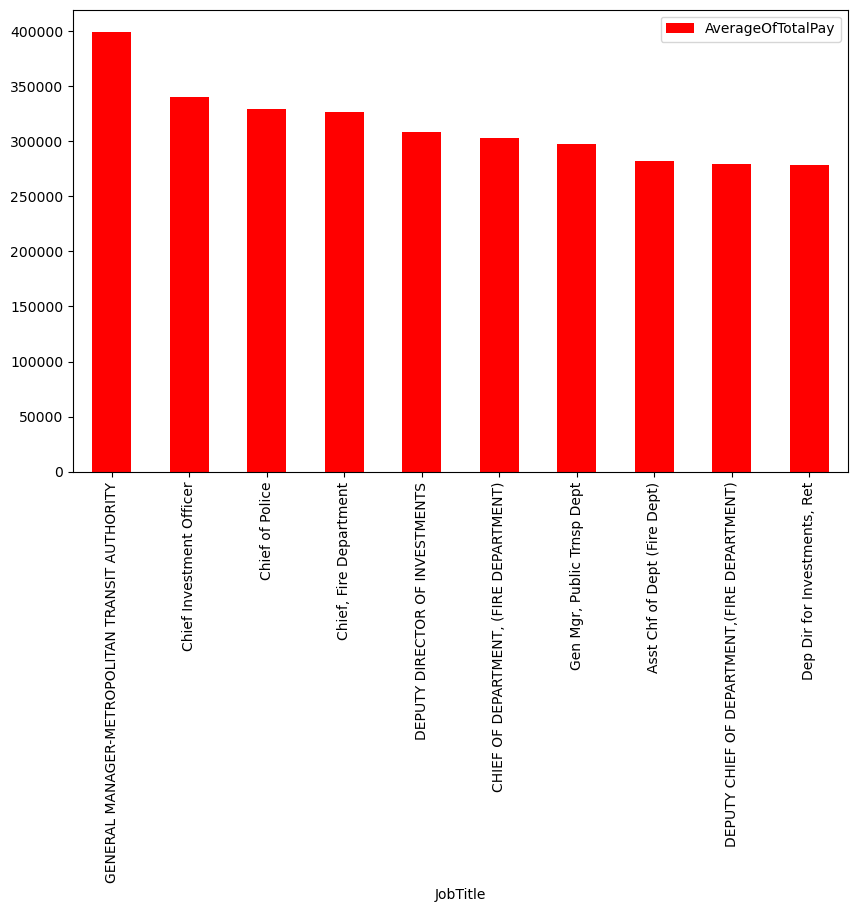

In [108]:
a = pd.read_sql_query(q, conn)
a.plot(kind='bar', x='JobTitle', y='AverageOfTotalPay', color='red', figsize=(10, 6))

# plt.xlabel('Jobtitle')
# plt.ylabel('Average of totalpay')
# plt.title('Top 10 Job Titles by Number of Employees')

# plt.show()

In [109]:
# Employees with TotalPay Greater Than 1,000,000 by JobTitle

q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    group by 2
    having totalpay > 100000
    '''

sql_query(q)

,count of employeename,JobTitle,TotalPay
0,10,ADMINISTRATIVE ENGINEER,149322.23
1,1,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.44
2,27,AIRPORT COMMUNICATIONS OPERATOR,106776.25
3,13,AIRPORT ECONOMIC PLANNER,111811.72
4,17,AIRPORT ELECTRICIAN,118617.32
...,...,...,...
941,82,Water Service Inspector,122666.75
942,38,Welder,132307.93
943,30,Wire Rope Cable Maint Mechanic,174293.82
944,3,Wire Rope Cable Maint Sprv,224833.47


In [110]:
q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    having totalpay > 100000
    group by 2
    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    having totalpay > 100000
    group by 2
    ': near "group": syntax error

In [111]:
q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    where totalpay > 100000
    group by 2
    '''

sql_query(q)

,count of employeename,JobTitle,TotalPay
0,9,ADMINISTRATIVE ENGINEER,149322.23
1,1,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.44
2,3,AIRPORT COMMUNICATIONS OPERATOR,106776.25
3,13,AIRPORT ECONOMIC PLANNER,111811.72
4,14,AIRPORT ELECTRICIAN,118617.32
...,...,...,...
1055,14,Welder,132307.93
1056,20,Wire Rope Cable Maint Mechanic,174293.82
1057,3,Wire Rope Cable Maint Sprv,224833.47
1058,4,Worker's Comp Supervisor 1,101722.05


In [112]:
q = '''select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    group by 2
    where totalpay > 100000

    '''

sql_query(q)

DatabaseError: Execution failed on sql 'select count(employeename) 'count of employeename', jobtitle, totalpay from salaries
    group by 2
    where totalpay > 100000

    ': near "where": syntax error

In [113]:
# Employees with Average BasePay Greater Than 50,000 by JobTitle

q = '''select avg(basepay), jobtitle, employeename from salaries
    group by 2'''

sql_query(q)

,avg(basepay),JobTitle,EmployeeName
0,43300.806506,ACCOUNT CLERK,NAPOLEON VIRAY
1,46643.172000,ACCOUNTANT,CARLITO NEPACENA
2,28732.663958,ACCOUNTANT INTERN,PENG HUANG
3,62290.780000,"ACPO,JuvP, Juv Prob (SFERS)",Palminder K Hernandez
4,66374.400000,ACUPUNCTURIST,WEN XU
...,...,...,...
2154,47664.773077,X-RAY LABORATORY AIDE,DELBERT LEE
2155,46086.387100,X-Ray Laboratory Aide,Delbert Lee
2156,52609.910000,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",MARIO YEDIDIA
2157,39077.957500,Youth Comm Advisor,Mario Yedidia


### case

Categorizing Employees Based on overtimepay > 100000 'overtime worker' else 'regular worker'

In [80]:
q='''select employeename, overtimepay,
    case
    when overtimepay > 100000 then 'overtime worker'
    else 'regular worker'
    end as WorkCategory
from salaries'''

sql_query(q)

,EmployeeName,OvertimePay,WorkCategory
0,NATHANIEL FORD,0,regular worker
1,GARY JIMENEZ,245131.88,overtime worker
2,ALBERT PARDINI,106088.18,overtime worker
3,CHRISTOPHER CHONG,56120.71,regular worker
4,PATRICK GARDNER,9737,regular worker
...,...,...,...
148649,Roy I Tillery,0,regular worker
148650,Not provided,Not Provided,overtime worker
148651,Not provided,Not Provided,overtime worker
148652,Not provided,Not Provided,overtime worker


Categorizing Job Titles Based on totalpay > 100000 'executive level', > 50k and < 99999 'management level' , else 'officer level'

Categorizing Employees Based on BasePay > 100000 'high paying job', between 50k to 99999 'medium paying job', else 'low paying job'

In [81]:
q='''select employeename, basepay,
    case
    when basepay > 100000 then 'high paying job'
    when basepay between 50000 and 99999 then 'medium paying job'
    else 'low paying job'
    end as PayingCategory
from salaries'''

sql_query(q)

,EmployeeName,BasePay,PayingCategory
0,NATHANIEL FORD,167411.18,high paying job
1,GARY JIMENEZ,155966.02,high paying job
2,ALBERT PARDINI,212739.13,high paying job
3,CHRISTOPHER CHONG,77916,medium paying job
4,PATRICK GARDNER,134401.6,high paying job
...,...,...,...
148649,Roy I Tillery,0,low paying job
148650,Not provided,Not Provided,high paying job
148651,Not provided,Not Provided,high paying job
148652,Not provided,Not Provided,high paying job


 ### String Function

upper/lower

In [82]:
q='''select lower(jobtitle) from salaries'''

sql_query(q)

,lower(jobtitle)
0,general manager-metropolitan transit authority
1,captain iii (police department)
2,captain iii (police department)
3,wire rope cable maintenance mechanic
4,"deputy chief of department,(fire department)"
...,...
148649,custodian
148650,not provided
148651,not provided
148652,not provided


replace

In [88]:
q='''select replace(employeename, 'Not provided', 'N/A') from salaries
'''

sql_query(q)

,"replace(employeename, 'Not provided', 'N/A')"
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,N/A
148651,N/A
148652,N/A


length

In [89]:
q='''select length(employeename) from salaries'''

sql_query(q)

,length(employeename)
0,14
1,12
2,14
3,17
4,15
...,...
148649,13
148650,12
148651,12
148652,12


In [90]:
q='''select length(employeename) - 2 from salaries'''

sql_query(q)

,length(employeename) - 2
0,12
1,10
2,12
3,15
4,13
...,...
148649,11
148650,10
148651,10
148652,10


SUBSTR(string, start_position, length)

In [91]:
q='''select substr(employeename, 1, 5) from salaries'''

sql_query(q)

,"substr(employeename, 1, 5)"
0,NATHA
1,GARY
2,ALBER
3,CHRIS
4,PATRI
...,...
148649,Roy I
148650,Not p
148651,Not p
148652,Not p


In [92]:
q='''select substr(employeename, 1) from salaries'''

sql_query(q)

,"substr(employeename, 1)"
0,NATHANIEL FORD
1,GARY JIMENEZ
2,ALBERT PARDINI
3,CHRISTOPHER CHONG
4,PATRICK GARDNER
...,...
148649,Roy I Tillery
148650,Not provided
148651,Not provided
148652,Not provided


In [93]:
q='''select substr(employeename, 3) from salaries'''

sql_query(q)

,"substr(employeename, 3)"
0,THANIEL FORD
1,RY JIMENEZ
2,BERT PARDINI
3,RISTOPHER CHONG
4,TRICK GARDNER
...,...
148649,y I Tillery
148650,t provided
148651,t provided
148652,t provided


Numeric Function

Round

In [94]:
q='''select round(basepay , 1) from salaries'''

sql_query(q)

,"round(basepay , 1)"
0,167411.2
1,155966.0
2,212739.1
3,77916.0
4,134401.6
...,...
148649,0.0
148650,0.0
148651,0.0
148652,0.0


In [95]:
q='''select round(basepay , 3) from salaries'''

sql_query(q)

,"round(basepay , 3)"
0,167411.18
1,155966.02
2,212739.13
3,77916.00
4,134401.60
...,...
148649,0.00
148650,0.00
148651,0.00
148652,0.00


ABS
negative to positive

In [97]:
q='''select abs(otherpay), otherpay from salaries
'''

sql_query(q)

,abs(otherpay),OtherPay
0,400184.25,400184.25
1,137811.38,137811.38
2,16452.60,16452.6
3,198306.90,198306.9
4,182234.59,182234.59
...,...,...
148649,0.00,0
148650,0.00,Not Provided
148651,0.00,Not Provided
148652,0.00,Not Provided


CAST

In [98]:
q='''pragma table_info(salaries)'''

sql_query(q)

,cid,name,type,notnull,dflt_value,pk
0,0,Id,INTEGER,0,None,1
1,1,EmployeeName,TEXT,0,None,0
2,2,JobTitle,TEXT,0,None,0
3,3,BasePay,NUMERIC,0,None,0
4,4,OvertimePay,NUMERIC,0,None,0
5,5,OtherPay,NUMERIC,0,None,0
6,6,Benefits,NUMERIC,0,None,0
7,7,TotalPay,NUMERIC,0,None,0
8,8,TotalPayBenefits,NUMERIC,0,None,0
9,9,Year,INTEGER,0,None,0


In [99]:
q='''select cast(id as float), id from salaries
'''

sql_query(q)

,cast(id as float),Id
0,1.0,1
1,2.0,2
2,3.0,3
3,4.0,4
4,5.0,5
...,...,...
148649,148650.0,148650
148650,148651.0,148651
148651,148652.0,148652
148652,148653.0,148653


MOD

use of sign %

In [101]:
q='''select totalpay % 10,totalpay from salaries'''

sql_query(q)

,totalpay % 10,TotalPay
0,5.0,567595.43
1,9.0,538909.28
2,9.0,335279.91
3,3.0,332343.61
4,3.0,326373.19
...,...,...
148649,0.0,0.00
148650,0.0,0.00
148651,0.0,0.00
148652,0.0,0.00
